In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 10]
plt.style.use('ggplot')

# 군집 평가 - 실루엣 계수 

- 각 군집 간의 거리가 얼마나 효율적으로 분리 돼있는지를 나타낸다. 효율적으로 잘 분리 됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다. 군집화가 잘 될 수록 개별 군집은 비슷한 정도의 여우 공간을 가지고 떨어져 있을 것이다.
- 실루엣 계수는 개별 데이터가 가지는 군집화 지표로 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화 돼있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표이다 .

- a(i) : 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값

- b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

- 두 군집 간의 거리 값은 b(i) - a(i) 이며 이 값을 정규화 하기 위해 Max(a(i),b(i)) 값으로 나눈다. 따라서 i 번째 데이터 포인트의 실루엣 계수 값 s(i) 는 다음과 같이 정의된다.

<img src='https://t1.daumcdn.net/cfile/tistory/99BC644B5F4346CA10'>

- 실루엣 계수는 -1 에서 1사이의 값을 가지며, 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까울 수록 근처의 군집과 가까워 진다는 의미이다.

<img src="https://t1.daumcdn.net/cfile/tistory/995D6D455F4346C315" width="500">

### 성능이 좋은 군집의 특징 

- 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울 수록 좋다.

- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 작아야한다. 즉 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.

- 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화가 아니다.


### 사이킷런의 실루엣 분석 관련 메서드

#### sklearn.metrics.silhouette_samples(X, labels, metric=’euclidean’, **kwds) 

#### sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’, smaple_szie = None, **kwds) 
```
값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있다. (절대적인 기준이 될 수는 없다.)
```

### 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# 군집 평가 메서드 추가
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
# 데이터 셋 준비
from sklearn.datasets import load_iris

iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


#### 요소
```
KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)

n_clusters : 군집 갯수. 군집중심점의 갯수 
init : 초기 군집중심점. k-means++ 알고리즘이 알아서 처리 
max-iter : 최대반복횟수
labels : 데이터포인트가 속한 군집 중심점 레이블
cluster_centers : 각 군집중심점 좌표
```

In [4]:
model_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)
model_kmeans.fit(df_iris)
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [5]:
model_kmeans.predict(df_iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [6]:
# 군집 결과 라벨 추가
df_iris['cluster'] = model_kmeans.labels_

In [7]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [8]:
from sklearn.decomposition import PCA

# 스케일링
iris_scaled = StandardScaler().fit_transform(iris.data)
# print(iris_scaled)

# 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df_iris['pca_x'] = pca_transformed[:,0]
df_iris['pca_y'] = pca_transformed[:,1]

In [9]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,-2.888991,-0.144949


### 실루엣 계수

인자로 X feature 데이터 셋과 각 피처 데이터 셋이 속한 군집 레이블 값인 labels 데이터를 입력해주면 
각 데이터 포인트의 실루엣 계수를 계산해 반환한다.

```
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_samples(Xdata, clusterData)

```

In [10]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster',
       'pca_x', 'pca_y'],
      dtype='object')

In [11]:
df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'cluster']].head(4)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1


In [12]:
silhouette_samples(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'cluster']],df_iris['cluster'])

array([0.85885242, 0.82305028, 0.83567987, 0.81290735, 0.85518741,
       0.75991827, 0.82847818, 0.86005478, 0.76143419, 0.8326006 ,
       0.81136816, 0.84293352, 0.81804328, 0.75415567, 0.71303549,
       0.65724484, 0.78424137, 0.85710775, 0.72065425, 0.8276396 ,
       0.7946902 , 0.83327523, 0.79936852, 0.80458814, 0.7861609 ,
       0.80791149, 0.84113237, 0.84874264, 0.85006606, 0.82566886,
       0.82334851, 0.80818512, 0.77160074, 0.73238576, 0.83609048,
       0.83848629, 0.80228751, 0.847863  , 0.7768243 , 0.85671603,
       0.8552095 , 0.65232157, 0.7940982 , 0.80960851, 0.75976518,
       0.81759049, 0.82123356, 0.82596066, 0.8258018 , 0.85809769,
       0.44551038, 0.62673275, 0.49434457, 0.68205736, 0.63302537,
       0.718578  , 0.59471359, 0.32683955, 0.60733933, 0.631986  ,
       0.41536175, 0.71362396, 0.6547472 , 0.68726839, 0.59309036,
       0.58018263, 0.69710217, 0.70756903, 0.63981518, 0.67298542,
       0.61063844, 0.70336641, 0.60913122, 0.68032958, 0.67005

In [13]:
score_samples = silhouette_samples(iris.data, df_iris['cluster'])
score_samples = silhouette_samples(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'cluster']], df_iris['cluster'])
score_samples.shape

(150,)

In [14]:
score_samples = silhouette_samples(iris.data, df_iris['cluster'])
score_samples = silhouette_samples(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'cluster']], df_iris['cluster'])
score_samples.shape

(150,)

In [15]:
score_samples[:5]

array([0.85885242, 0.82305028, 0.83567987, 0.81290735, 0.85518741])

In [16]:
df_iris['silhouette_coeff'] = score_samples

df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,pca_x,pca_y,silhouette_coeff
9,4.9,3.1,1.5,0.1,1,-2.672756,-0.113774,0.832601
126,6.2,2.8,4.8,1.8,0,1.258508,-0.179705,0.627799
60,5.0,2.0,3.5,1.0,0,-0.507841,-1.265971,0.415362
98,5.1,2.5,3.0,1.1,0,-0.906470,-0.756093,0.228549
64,5.6,2.9,3.6,1.3,0,-0.173925,-0.254854,0.593090


In [17]:
# 실루엣 계수 스코어
#  average_score = silhouette(x, 군집결과cluster label )
average_score = silhouette_score(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df_iris['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))
print('군집별 실루엣계수 절편 평균: ',df_iris['silhouette_coeff'].mean())

붓꽃 데이터셋 Silhouette Analysis Score:0.553
군집별 실루엣계수 절편 평균:  0.6851559988597147


<AxesSubplot:>

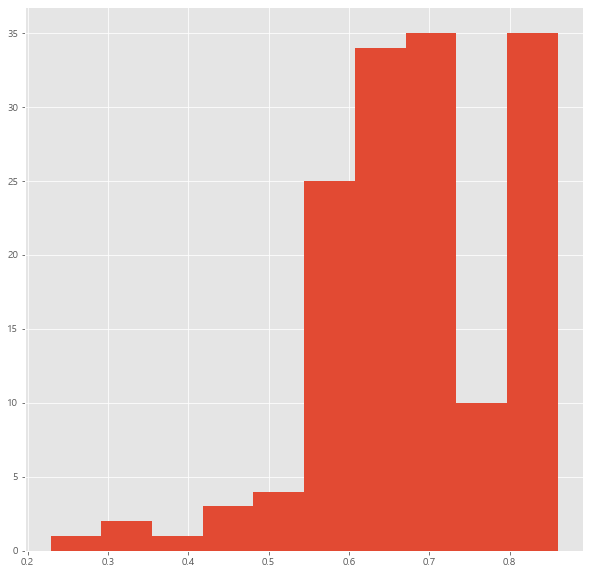

In [18]:
df_iris['silhouette_coeff'].hist()

In [19]:
# 군집별 실루엣 계수 평균
df_iris.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.613674
1    0.806393
2    0.642262
Name: silhouette_coeff, dtype: float64

<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

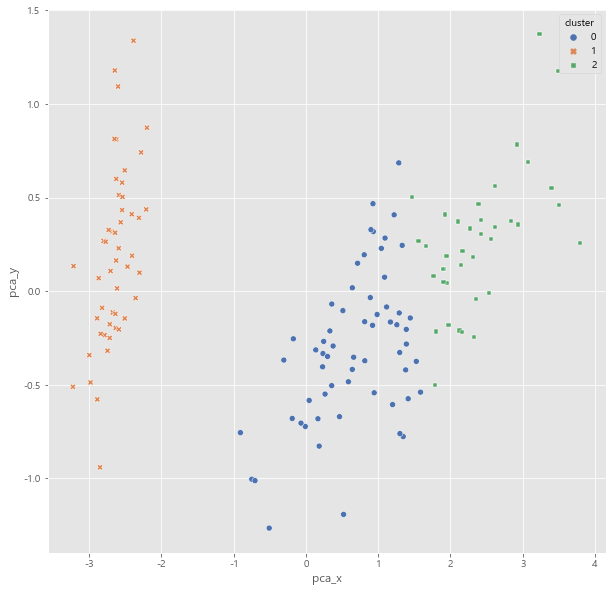

In [20]:
# seaborn 결과 : 군집 최종 라벨 기준 
sns.scatterplot(x='pca_x', y='pca_y', data=df_iris, hue='cluster', style='cluster', palette='deep')


### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

In [21]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# 실루엣계수값들이 어떻게 분포되어있는지 샘플 예제 

In [22]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

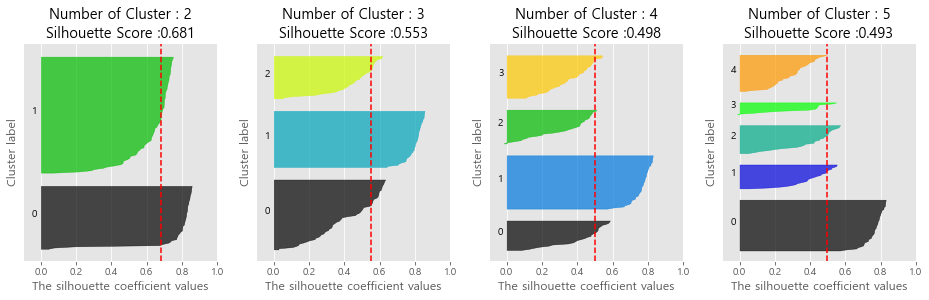

In [23]:
from sklearn.datasets import load_iris

iris=load_iris()


# visualize_silhouette(군집 리스트, X데이터)
visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

### make_blobs 를 이용하여 예제 생성 후 군집 시각화

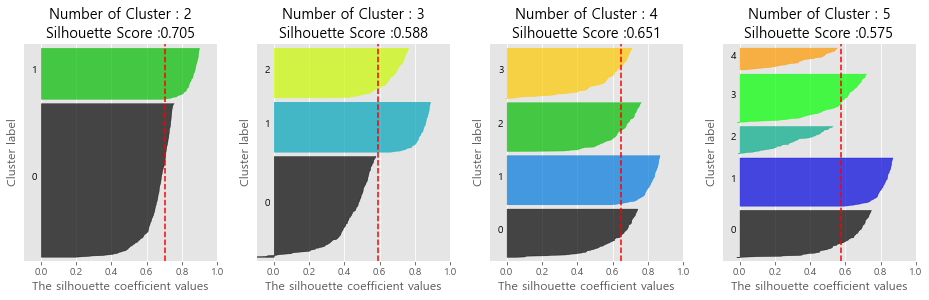

In [24]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

visualize_silhouette([ 2, 3, 4, 5], X)

In [25]:
# 데이타프레임화 
df_cluster = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])

# 타겟 y 라벨 추가 
df_cluster['target'] = y


df_cluster.sample(5)

,ftr1,ftr2,target
414,-10.033080,-1.842743,1
120,-10.699057,-4.490572,1
489,-9.891490,-5.479029,1
2,-9.630481,-2.720449,1
373,-6.098343,-7.440179,2


In [26]:
df_cluster['target'].values

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,

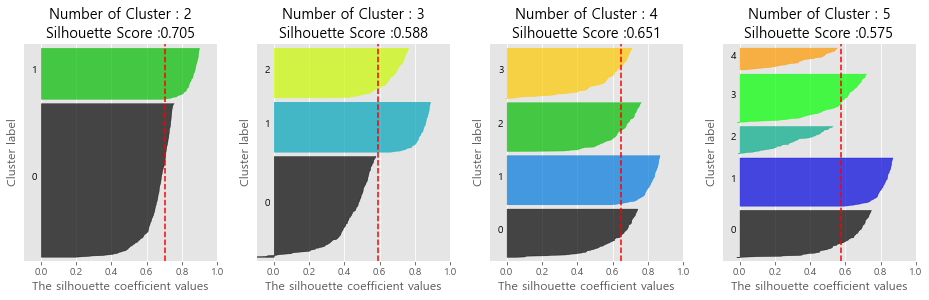

In [27]:

iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], X)